<h1>1.</h1>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import time
import datetime
from datetime import date
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import lightgbm as lgb
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

In [ ]:
import pandas as pd
import numpy as np
test=pd.read_csv('/home/sahar/Desktop/archive/test.csv')
train=pd.read_csv('/home/sahar/Desktop/archive/train.csv')
data=pd.concat([train, test])

In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


In [4]:
data=data.drop(columns=['id'])

In [5]:
data.isna()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [6]:
data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [7]:
data.isna()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
data.shape

(2000, 21)

In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

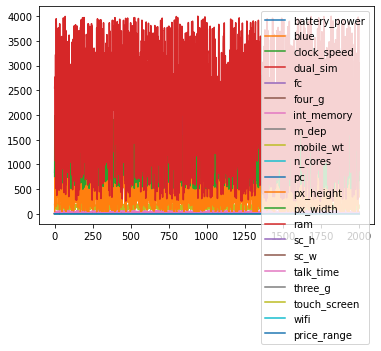

In [12]:
data.plot()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

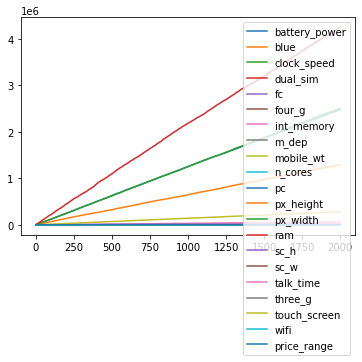

In [14]:
df = data.cumsum()
plt.figure()
df.plot()

<AxesSubplot:>

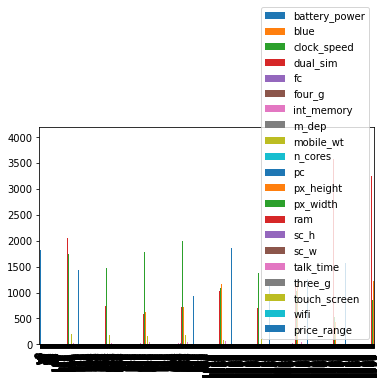

In [15]:
data.plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

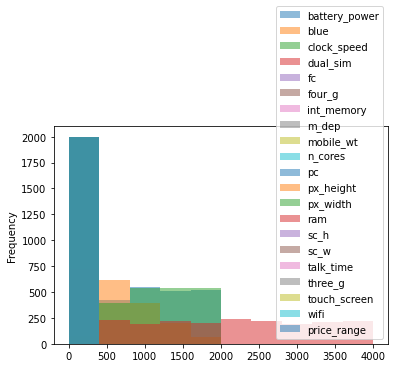

In [16]:
data.plot.hist(alpha=0.5)

In [17]:
#Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.482, p=0.000
Probably not Gaussian


/home/sahar/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
#Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(data["clock_speed"], data["dual_sim"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.001, p=0.953
Probably independent


In [21]:
#Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data["clock_speed"], data["dual_sim"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.000, p=1.000
Probably independent


In [24]:
# Student's t-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(data["clock_speed"], data["dual_sim"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=47.325, p=0.000
Probably different distributions


In [26]:
#Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(data["clock_speed"], data["dual_sim"],data["mobile_wt"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=30918.400, p=0.000
Probably different distributions


In [61]:
import sklearn
target=data["price_range"]
features=data.drop(columns=["price_range"])

In [62]:
target

0       1.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
1995    0.0
1996    2.0
1997    3.0
1998    0.0
1999    3.0
Name: price_range, Length: 2000, dtype: float64

In [63]:
features

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(features,target)
preds = gnb.predict(features)
print(preds)
from sklearn.metrics import confusion_matrix
confusion_matrix(target, preds)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(target, preds)
print(accuracy)

[1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0]
0.96


In [64]:
# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# define dataset
features, target = make_classification(n_classes=2, random_state=1)
# define model
model = SVC()
# define ovo strategy
ovo = OneVsOneClassifier(model)
# fit model
ovo.fit(features, target)
# make predictions
yhat = ovo.predict(features)
print(yhat)

[1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0]


In [66]:

# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
features, target = make_classification(n_classes=2, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(features, target)
# make predictions
yhat = ovr.predict(features)
print(yhat)

[1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0]


The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.
The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.

In [92]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,target,test_size=0.2, random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_labels, preds)
print(accuracy)
print(preds)

1.0
[0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1]


Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.<br></br>
Soloutions:<br></br>
1.Undersampling- Randomly delete the class which has sufficient observations so that the comparative ratio of two classes is significant in our data.Although this approach is really simple to follow but there is a high possibility that the data that we are deleting may contain important information about the predictive class.<br></br>
2.Oversampling-For the unbalanced class randomly increase the number of observations which are just copies of existing samples.This ideally gives us sufficient number of samples to play with.The oversampling may lead to overfitting to the training data<br></br>
3.Synthetic sampling(SMOTE)-The technique asks to synthetically manufacture observations of unbalanced classes which are similar to the existing using nearest neighbors classification.The problem is what to do when the number of observations of is an extremely rare class .For example-we may have only one picture of a rare species which we want to identify using image classification algorithm

<AxesSubplot:>

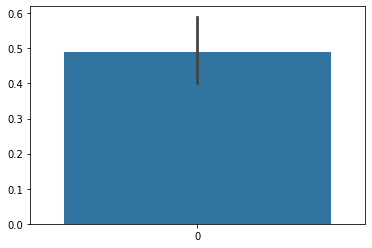

In [73]:
import seaborn as sns
sns.barplot(data=target)

data is balanced

In [75]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[0.22778891 0.         0.68       ... 0.         1.         0.33333333]
 [0.34736139 1.         0.         ... 1.         0.         0.66666667]
 [0.04141617 1.         0.         ... 1.         0.         0.66666667]
 ...
 [0.94188377 0.         0.16       ... 1.         0.         1.        ]
 [0.6753507  0.         0.16       ... 1.         1.         0.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [76]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[-0.90259726 -0.9900495   0.83077942 ... -1.00601811  0.98609664
  -0.4472136 ]
 [-0.49513857  1.0100505  -1.2530642  ...  0.99401789 -1.01409939
   0.4472136 ]
 [-1.5376865   1.0100505  -1.2530642  ...  0.99401789 -1.01409939
   0.4472136 ]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.99401789 -1.01409939
   1.34164079]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.99401789  0.98609664
  -1.34164079]
 [-1.65833069  1.0100505   0.58562134 ...  0.99401789  0.98609664
   1.34164079]]


In [85]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(tol=0.75) #0.8,0.9,0.95,0.99
reduced = pd.DataFrame(pca.fit_transform(features))

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
model = gnb.fit(reduced,target)
preds = gnb.predict(reduced)
accuracy=accuracy_score(target, preds)
print(preds)
print(accuracy)

[1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0]
0.98


accuracy improved.